In [81]:
import pandas as pd
import pymssql

database = "Pushing-P-DB"
table = "dbo.Training_Set"
user = "pushing_p"
password  = "t3stP@ssword"
server = "gen10-data-fundamentals-22-02-sql-server.database.windows.net"


# Retrieve Training Data for Poisson Model

conn = pymssql.connect(server, user, password, database)

cursor = conn.cursor()

# Use a Selct Query to get rows from SQL table
cursor.execute(f"SELECT * FROM {table}")

# Iterate over rows stored in cursor and place them in a list
row_list = []
for row in cursor:
    row_list.append(row)

# Convert list of rows into a Pandas DataFrame
df = pd.DataFrame(row_list, columns = ['State','County','Population Estimate (2019)','RUCC_2013','Age Category',
'Sex Category','Median Household Income (2019)','Number of Unemployed People (2019)',
'Unemployment Rate (2019)','Number of Uninsured (2019)','% Uninsured','Latitude','Longitude'])

In [82]:
df.head()

,State,County,Population Estimate (2019),RUCC_2013,Age Category,Sex Category,Median Household Income (2019),Number of Unemployed People (2019),Unemployment Rate (2019),Number of Uninsured (2019),% Uninsured,Latitude,Longitude
0,KS,Morris County,5620,8,1,2,54775,82,2.7,714,12.704626,38.688204,-96.651448
1,KS,Morris County,5620,8,5,2,54775,82,2.7,665,11.832740,38.688204,-96.651448
2,GA,Murray County,40096,3,2,2,50061,813,5.2,5086,12.684557,34.797097,-84.73799
3,NE,Holt County,10067,7,3,2,54474,145,2.5,281,2.791298,42.459287,-98.784766
4,OR,Morrow County,11603,6,1,1,59781,233,4,2161,18.624494,45.425496,-119.602311


In [83]:
df.describe()

,Age Category,Sex Category,Number of Uninsured (2019),% Uninsured
count,24952.00000,24952.00000,2.495200e+04,24952.000000
mean,2.75000,1.50000,9.648478e+03,9.804937
std,1.47905,0.50001,4.404187e+04,6.990858
min,1.00000,1.00000,0.000000e+00,0.000000
25%,1.75000,1.00000,7.670000e+02,4.434486
50%,2.50000,1.50000,2.070000e+03,7.894876
75%,3.50000,2.00000,5.856000e+03,13.337897
max,5.00000,2.00000,1.806067e+06,53.790830


In [84]:
# Get Dummy Columns
df.drop('RUCC_2013',axis=1,inplace=True)
df = pd.get_dummies(df, columns=['Age Category','Sex Category'], drop_first=True)

In [85]:
# Convert columns to proper data types
df[['Median Household Income (2019)','Number of Unemployed People (2019)']] = df[['Median Household Income (2019)','Number of Unemployed People (2019)']].astype(int)
df['Unemployment Rate (2019)'] = df['Unemployment Rate (2019)'].astype(float)
df['Population Estimate (2019)'] = df['Population Estimate (2019)'].astype(int)
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

In [86]:
df.head()

,State,County,Population Estimate (2019),Median Household Income (2019),Number of Unemployed People (2019),Unemployment Rate (2019),Number of Uninsured (2019),% Uninsured,Latitude,Longitude,Age Category_2,Age Category_3,Age Category_5,Sex Category_2
0,KS,Morris County,5620,54775,82,2.7,714,12.704626,38.688204,-96.651448,0,0,0,1
1,KS,Morris County,5620,54775,82,2.7,665,11.832740,38.688204,-96.651448,0,0,1,1
2,GA,Murray County,40096,50061,813,5.2,5086,12.684557,34.797097,-84.737990,1,0,0,1
3,NE,Holt County,10067,54474,145,2.5,281,2.791298,42.459287,-98.784766,0,1,0,1
4,OR,Morrow County,11603,59781,233,4.0,2161,18.624494,45.425496,-119.602311,0,0,0,0


In [87]:
df.shape

(24952, 14)

In [88]:
df.dtypes

State                                  object
County                                 object
Population Estimate (2019)              int64
Median Household Income (2019)          int64
Number of Unemployed People (2019)      int64
Unemployment Rate (2019)              float64
Number of Uninsured (2019)              int64
% Uninsured                           float64
Latitude                              float64
Longitude                             float64
Age Category_2                          uint8
Age Category_3                          uint8
Age Category_5                          uint8
Sex Category_2                          uint8
dtype: object

In [89]:
# Drop Loving County because % Uninsured is 0
df = df.loc[df['% Uninsured'] != 0]

In [90]:
# Regular Correlations
correllations = df.corr()

independent_variables = correllations[['% Uninsured']].sort_values(by = '% Uninsured',ascending=False)
# independent_variables.loc[(abs(independent_variables['% Uninsured']) >= 0.5) & (independent_variables['% Uninsured'] != 1)]
independent_variables

,% Uninsured
% Uninsured,1.000000
Age Category_5,0.340895
Number of Uninsured (2019),0.154392
Unemployment Rate (2019),0.059616
Number of Unemployed People (2019),-0.023139
Population Estimate (2019),-0.024646
Longitude,-0.066596
Sex Category_2,-0.104340
Age Category_2,-0.259547
Median Household Income (2019),-0.263525


In [91]:
# SQRT Correlations
from scipy import stats

mf = df.copy()

mf['% Uninsured (BOXCOX)'] = stats.boxcox(mf['% Uninsured'])[0]
mf.drop('% Uninsured',axis=1,inplace=True)
correllations = mf.corr()


independent_variables = correllations[['% Uninsured (BOXCOX)']].sort_values(by = '% Uninsured (BOXCOX)',ascending=False)
# independent_variables.loc[(abs(independent_variables['% Uninsured']) >= 0.5) & (independent_variables['% Uninsured'] != 1)]
independent_variables

,% Uninsured (BOXCOX)
% Uninsured (BOXCOX),1.000000
Age Category_5,0.383814
Number of Uninsured (2019),0.140104
Unemployment Rate (2019),0.071596
Number of Unemployed People (2019),-0.034149
Population Estimate (2019),-0.037887
Longitude,-0.072352
Sex Category_2,-0.099745
Age Category_2,-0.197807
Median Household Income (2019),-0.293370


In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Test the Independence of our Independent Variables
def Compute_VIF(independent_variables):
    
    X = df[independent_variables].copy()
  
    # the calculation of variance inflation factors requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif.loc[:,'Variable']!='intercept'].sort_values(by = 'VIF',ascending=False)
    return vif

In [93]:
# A VIF > 5 means that our variables are not significantly independent from each other
# Our independent variables are superb!
# VIF values lie on a range of 1 to infinity, with a 1 meaning the variable is fully independent of the others
df['Population Estimate (2019)'] = df['Population Estimate (2019)'].astype(int)
variables = list(df.drop(['% Uninsured','State','County','Population Estimate (2019)'],axis = 1).columns)
Compute_VIF(variables)

,Variable,VIF
1,Number of Unemployed People (2019),2.861205
3,Number of Uninsured (2019),2.777906
7,Age Category_3,1.536861
6,Age Category_2,1.519879
8,Age Category_5,1.500225
0,Median Household Income (2019),1.412857
2,Unemployment Rate (2019),1.237495
4,Latitude,1.169746
5,Longitude,1.064848
9,Sex Category_2,1.000554


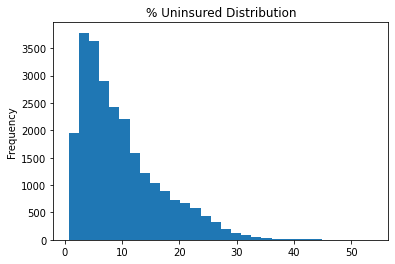

In [94]:
df['% Uninsured'].plot(kind='hist', title='% Uninsured Distribution', bins = 30);

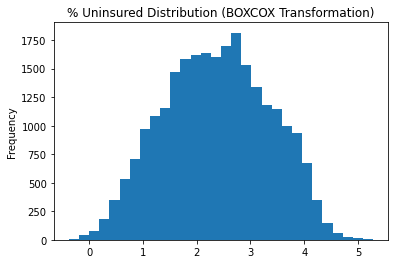

In [95]:
mf['% Uninsured (BOXCOX)'].plot(kind='hist', title='% Uninsured Distribution (BOXCOX Transformation)', bins = 30);

In [96]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


X, y = df.drop(['% Uninsured','State','County','Population Estimate (2019)'], axis = 1), df['% Uninsured']

# Apply BOXCOX transform to y values
y = stats.boxcox(y)[0]

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state = 0)

scaler = StandardScaler(with_mean=True, with_std=True)
# We use the TRAIN set ONLY to fit the scaler
scaler.fit(X_train)

# Now we can use the already fit scaler to TRANSFORM
# both TRAIN and VALIDATION sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# model = SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1,penalty='elasticnet')
model = SGDRegressor(max_iter = 10000, learning_rate = 'adaptive')

model.fit(X_train,y_train)

y_prediction =  model.predict(X_test)

0.7822403740270347


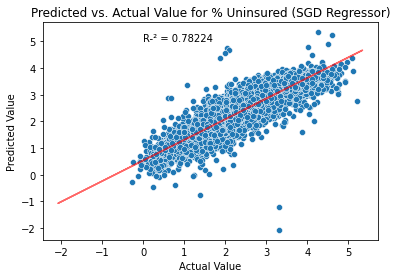

In [97]:
# Predicted vs Actual Values (SGDR Method)
from sklearn.metrics import r2_score
ax = sns.scatterplot(x = y_test, y = y_prediction)

ax.set_xlabel('Actual Value')
ax.set_ylabel('Predicted Value')
m,b = np.polyfit(y_test, y_prediction, 1)
plt.plot(y_prediction, m*y_prediction+b,color='red',alpha=0.6)
ax.annotate("R-\u00b2 = {:.5f}".format(r2_score(y_test, y_prediction)), (0, 5))
print(r2_score(y_test, y_prediction))
ax.set_title('Predicted vs. Actual Value for % Uninsured (SGD Regressor)')
plt.show()

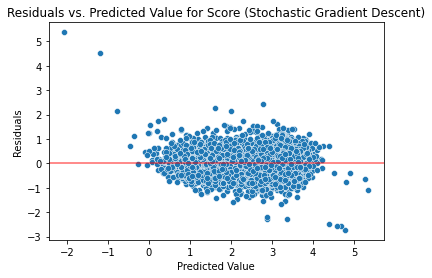

In [98]:
# Residuals vs. Predicted Values (Lasso Method)
residuals = y_test - y_prediction
ax = sns.scatterplot(x = y_prediction, y = residuals)
plt.axhline(y=0, color='r', linestyle='-', alpha = 0.6)
ax.set_xlabel('Predicted Value')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs. Predicted Value for Score (Stochastic Gradient Descent)')
plt.show()

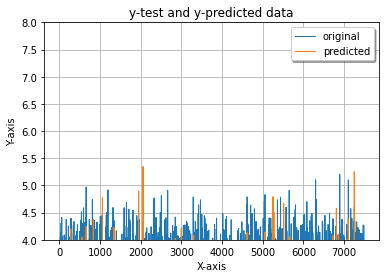

In [99]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_prediction, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.ylim(4,8)
plt.grid(True)
plt.show() 